In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import numpy as np
from datetime import datetime
pd.set_option('display.max_rows', 5000)

In [2]:
df = pd.read_csv(r'C:\Users\kentj\Desktop\8Props\Flat_resale_price\resale(EDA).csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,floor_area_sqf,unit_price_psf,year,month_sold,lease_year_left,storey1,storey2,avg_storey
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,333.6809,26.971876,1990,1,86,10,12,11.0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,333.6809,17.981251,1990,1,86,4,6,5.0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,333.6809,23.975001,1990,1,86,10,12,11.0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,333.6809,17.981251,1990,1,86,7,9,8.0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,785.7647,60.068873,1990,1,85,4,6,5.0


In [3]:
df.shape

(845204, 18)

# Preprocessing 
1. Drop all useless columns and make all variables numeric

In [4]:
df1 = pd.get_dummies(df[['town', 'flat_type', 'flat_model']])
df1.head()

,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,...,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_Simplified,flat_model_Standard,flat_model_TERRACE,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df2 = pd.concat([df, df1], axis = 1)
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_Simplified,flat_model_Standard,flat_model_TERRACE,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,...,0,0,0,0,0,0,0,0,0,0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,...,0,0,0,0,0,0,0,0,0,0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,...,0,0,0,0,0,0,0,0,0,0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,...,0,0,0,0,0,0,0,0,0,0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845204 entries, 0 to 845203
Data columns (total 86 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   month                              845204 non-null  object 
 1   town                               845204 non-null  object 
 2   flat_type                          845204 non-null  object 
 3   block                              845204 non-null  object 
 4   street_name                        845204 non-null  object 
 5   storey_range                       845204 non-null  object 
 6   floor_area_sqm                     845204 non-null  float64
 7   flat_model                         845204 non-null  object 
 8   lease_commence_date                845204 non-null  int64  
 9   resale_price                       845204 non-null  float64
 10  floor_area_sqf                     845204 non-null  float64
 11  unit_price_psf                     8452

In [10]:
df3 = df2.drop(columns = ['month','town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model'
                       , 'lease_commence_date', 'storey1', 'storey2'])
df3.head()

,resale_price,floor_area_sqf,unit_price_psf,year,month_sold,lease_year_left,avg_storey,town_ANG MO KIO,town_BEDOK,town_BISHAN,...,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_SIMPLIFIED,flat_model_STANDARD,flat_model_Simplified,flat_model_Standard,flat_model_TERRACE,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,9000.0,333.6809,26.971876,1990,1,86,11.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6000.0,333.6809,17.981251,1990,1,86,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8000.0,333.6809,23.975001,1990,1,86,11.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6000.0,333.6809,17.981251,1990,1,86,8.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,47200.0,785.7647,60.068873,1990,1,85,5.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Lowest price :5000.0
Highest price :1258000.0


C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


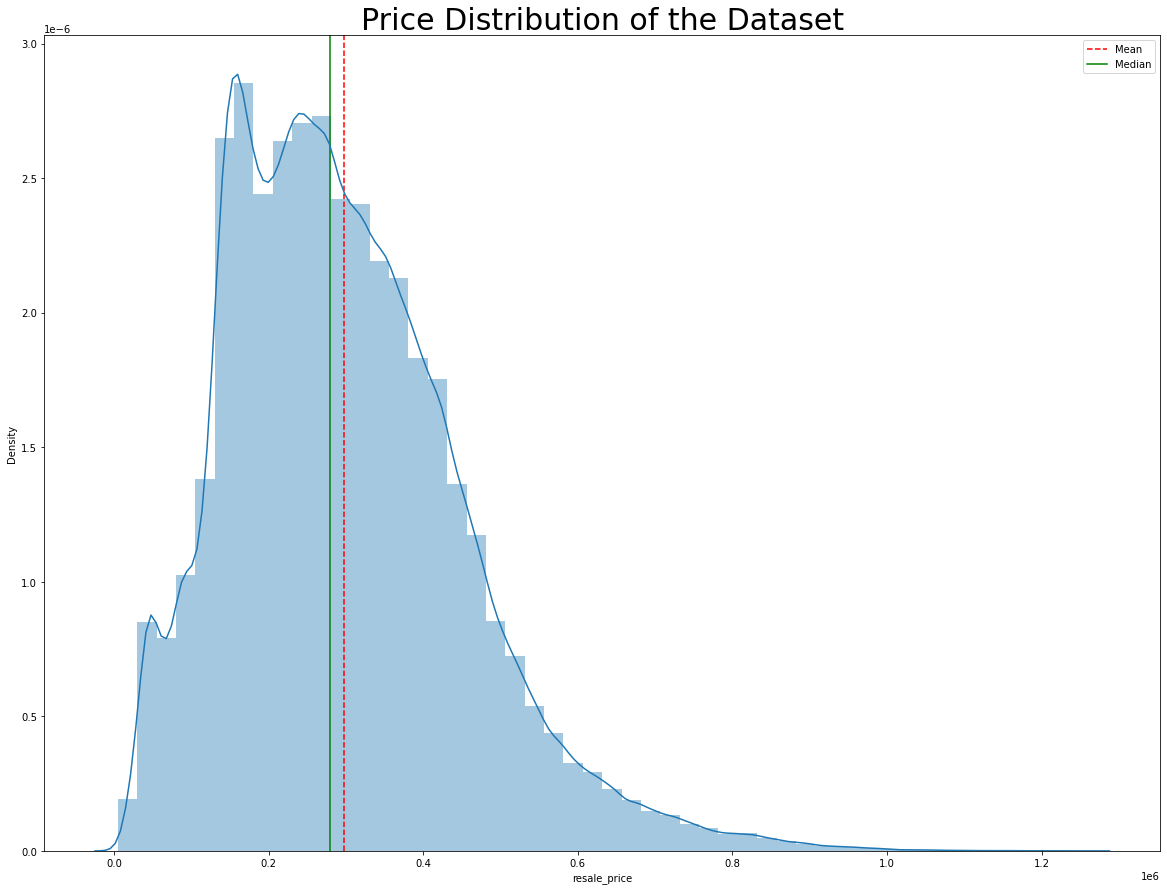

In [15]:
print('Lowest price :' + str(df3['resale_price'].min()))
print('Highest price :' + str(df3['resale_price'].max()))

plt.figure(figsize= (20, 15))
plt.title('Price Distribution of the Dataset',fontdict = {'fontsize': 30})
mean=df3['resale_price'].mean()
median=df3['resale_price'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.distplot(df3['resale_price']);

#distribution is skewed slightly positive. There is no need to normalize 

In [17]:
df3['lnprice'] = np.log(df3['resale_price'])

Smallest Area :301.3892
Largest Area :3304.5173


C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


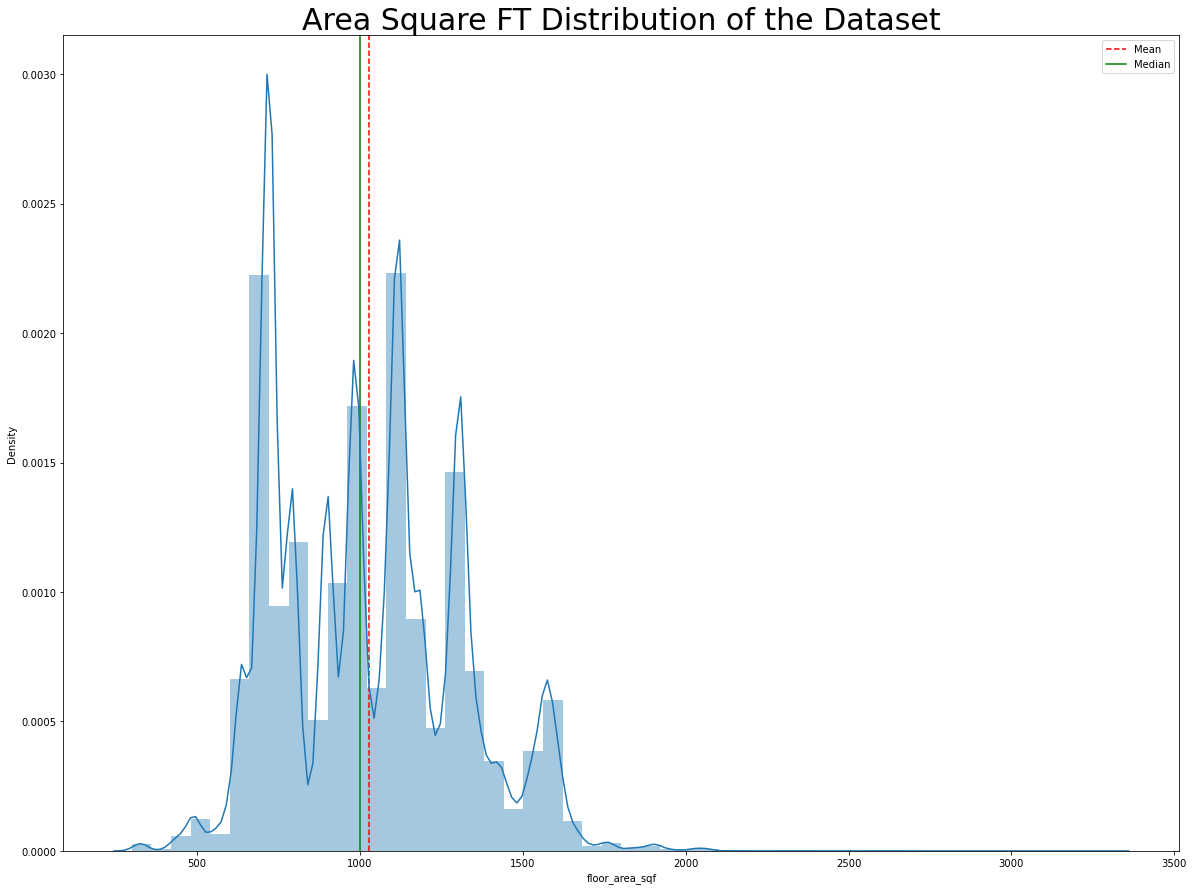

In [22]:
print('Smallest Area :' + str(df3['floor_area_sqf'].min()))
print('Largest Area :' + str(df3['floor_area_sqf'].max()))

plt.figure(figsize= (20, 15))
plt.title('Area Square FT Distribution of the Dataset',fontdict = {'fontsize': 30})
mean=df3['floor_area_sqf'].mean()
median=df3['floor_area_sqf'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.distplot(df3['floor_area_sqf']);

Lowest lease left :45
Highest lease left :101


C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


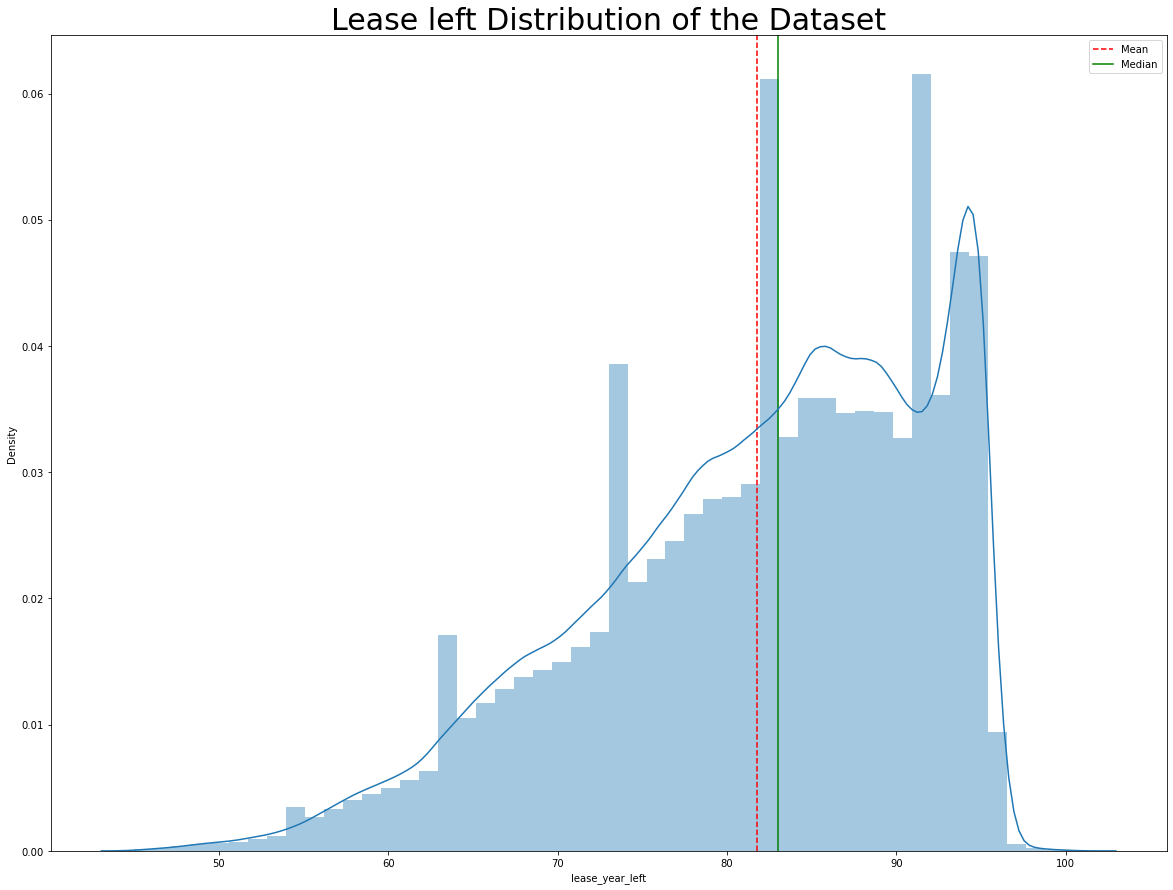

In [23]:
print('Lowest lease left :' + str(df3['lease_year_left'].min()))
print('Highest lease left :' + str(df3['lease_year_left'].max()))

plt.figure(figsize= (20, 15))
plt.title('Lease left Distribution of the Dataset',fontdict = {'fontsize': 30})
mean=df3['lease_year_left'].mean()
median=df3['lease_year_left'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.distplot(df3['lease_year_left']);

#distribution is negatively skewed. We attempt to normalize it. 

Lowest lease left :45
Highest lease left :101


C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


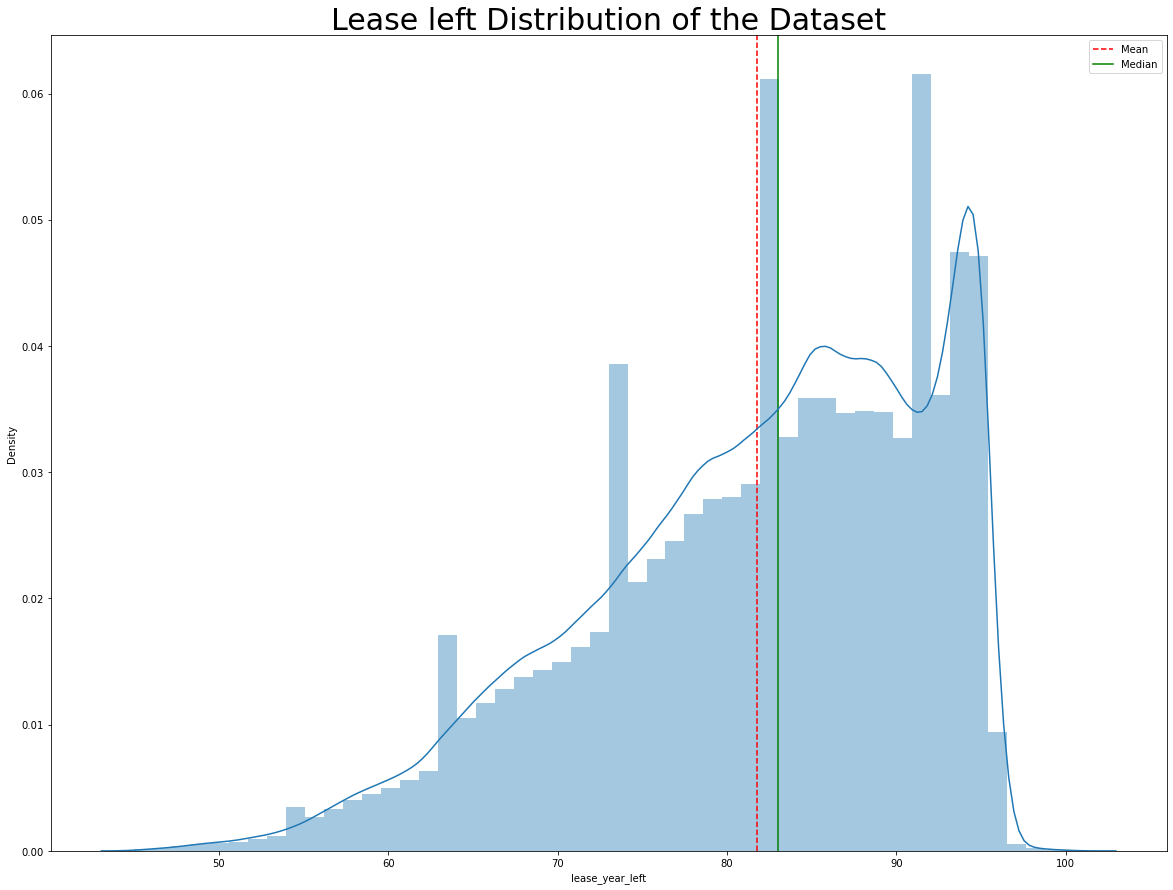

In [26]:
print('Lowest lease left :' + str((df3['lease_year_left']).min()))
print('Highest lease left :' + str((df3['lease_year_left']).max()))

plt.figure(figsize= (20, 15))
plt.title('Lease left Distribution of the Dataset',fontdict = {'fontsize': 30})
mean=(df3['lease_year_left']).mean()
median=(df3['lease_year_left']).median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.distplot((df3['lease_year_left']));


In [28]:
df['lease_year_left'].value_counts().sort_values()

101        4
45        42
100       47
99       100
46       128
98       211
47       215
48       335
49       489
97       514
50       581
51       696
52       913
53      1103
54      1439
55      1883
56      2530
57      3165
58      3799
59      4283
60      4745
61      5291
62      6011
63      7512
64      8672
96      8920
65      9991
66     11090
67     12122
68     13062
69     13567
70     14128
71     15267
72     16409
73     17371
74     19144
75     20179
76     21873
77     23209
78     25274
79     26364
80     26552
81     27487
82     28495
91     29023
92     29213
83     29403
90     30938
84     31035
87     32819
89     32917
88     33017
86     33944
85     33954
93     34194
95     44599
94     44936
Name: lease_year_left, dtype: int64

In [29]:
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm')